# California Housing Price Prediction using ANN

## Introduction
This notebook uses the California Housing dataset to predict house prices using a complex Artificial Neural Network (ANN) architecture. The aim is to demonstrate regression with neural networks.

## 1. Data Loading and Preprocessing

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [7]:
# Load dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Dataframe for better visualization
df = pd.DataFrame(X, columns=housing.feature_names)
df['Target'] = y

# Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 2. Building an ANN Model

In [8]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.1),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 3. Model Training

In [9]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size=32)

Epoch 1/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.0199 - mae: 0.7433 - val_loss: 0.5447 - val_mae: 0.5046
Epoch 2/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5038 - mae: 0.5255 - val_loss: 0.4157 - val_mae: 0.4667
Epoch 3/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4358 - mae: 0.4828 - val_loss: 0.3580 - val_mae: 0.4141
Epoch 4/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4054 - mae: 0.4627 - val_loss: 0.3513 - val_mae: 0.4170
Epoch 5/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3896 - mae: 0.4486 - val_loss: 0.3377 - val_mae: 0.4155
Epoch 6/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3594 - mae: 0.4305 - val_loss: 0.3403 - val_mae: 0.4059
Epoch 7/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3528 - mae: 0.4281 - val_loss: 0.3317 - val_mae: 0.3978
Epoch 8/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3633 - mae: 0.4298 - val_loss: 0.3522 - val_mae: 0.4045
Epoch 9/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - lo

## 4. Model Evaluation

In [10]:
X_test_scaled = scaler.transform(X_test)
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Mean Absolute Error: {test_mae:.4f}')

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 28.9426 - mae: 5.2573
Test Mean Absolute Error: 5.2476


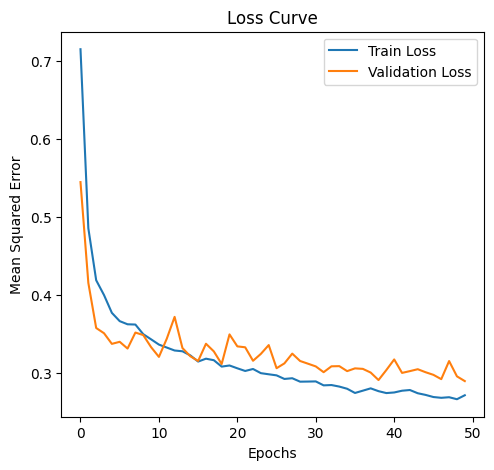

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Loss Curve')
plt.legend()

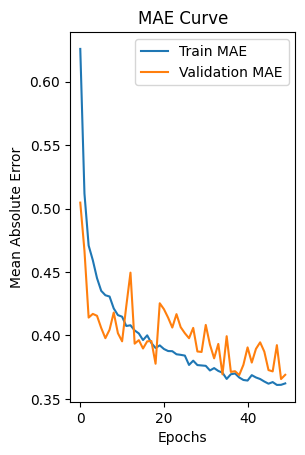

In [12]:
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('MAE Curve')
plt.legend()
plt.show()

In [13]:
y_pred = model.predict(X_test_scaled)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


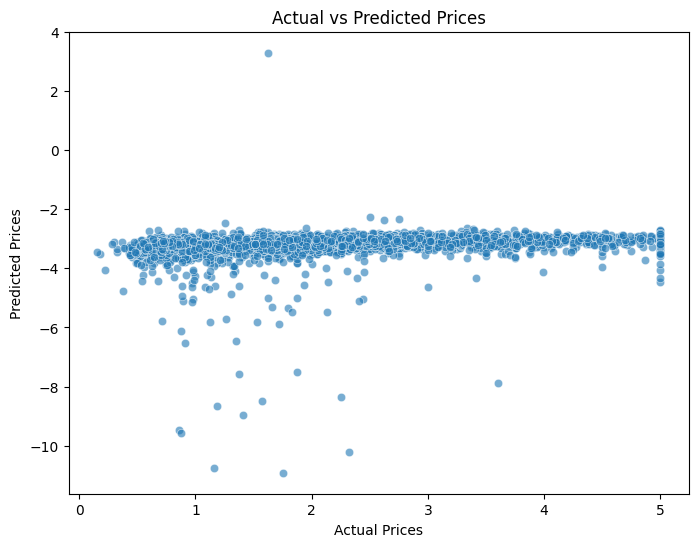

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred.flatten(), alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()